In [1]:
! pip install pytelegrambotapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.14.0-py3-none-any.whl size=215251 sha256=47bd188260503ec1ce149b5485dad44aa9e801822dfbb3efca46e16647c0cdf6
  Stored in directory: /root/.cache/pip/wheels/25/51/2d/24b40a366c85c37928d5aa36ddf257e5a79fad25e1ecd11b2c
Successfully built pytelegrambotapi


In [2]:
import telebot

In [3]:
API_TOKEN = ''
bot = telebot.TeleBot(API_TOKEN)

In [4]:
!pip install pandas pandasai==0.8.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 849.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.16.1 which is incompatible.


In [5]:
import pandas as pd
from pandasai import PandasAI

In [6]:
from pandasai.llm.starcoder import Starcoder

In [7]:
llm = Starcoder(api_token="")

In [8]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = ''
csv_files = glob.glob(path + "./*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
#big_df   = pd.concat(df_list, ignore_index=True)
url='https://raw.githubusercontent.com/KhovetS2/bertoti/main/demofile2.csv'
big_df = pd.read_csv(url)

In [9]:
pandas_ai = PandasAI(llm, conversational=False)

In [10]:
res = pandas_ai.run(big_df, prompt='show the 10 states with more fires')

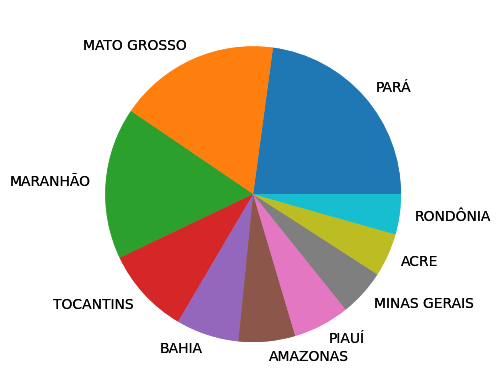

In [11]:
res = pandas_ai.run(big_df, prompt='plot a pie chart that show the 10 states with more fires')

In [12]:
print(res)
type(res)

Axes(0.22375,0.11;0.5775x0.77)


matplotlib.axes._axes.Axes

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import pandas


@bot.message_handler(func=lambda message: True)
def response(message):

  response = pandas_ai.run(big_df, prompt=message.text)


  if type(response) == matplotlib.axes._axes.Axes:
    buffer = BytesIO()
    response.figure.savefig(buffer, format='png')
    buffer.seek(0)
    bot.send_photo(message.chat.id, photo=buffer)
    buffer.close()
    plt.clf()
  elif type(response) == pandas.core.series.Series:
    stringSaida = response.to_string(header=False)
    bot.send_message(message.chat.id, stringSaida)


In [ ]:
bot.polling()